# CC 3230( AI  and Machine Learning Lab.)
Date:- 18.04.2022( 9:00 - 10:30 AM)
Week-10
Technique: Ensemble Learning
Problem: Bagging and Decision Trees

Name: Ananya Agrawal

Registration Number: 199303010

#### Title: CC3230 A-1

Submission Date: 18/04/2022

### Ensemble Learning:

Ensemble learning is a general meta approach to machine learning technique that combines several base models in order to produce one optimal predictive model.

It a combination of base learners in either parallel(Bagging) or in sequence(Boosting).

Bagging involves fitting many decision trees on different samples of the same dataset and averaging the predictions.

Boosting involves adding ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.

### To Do:

create some random demo numerical data

use single decision tree

ensemble classifier

and then ensemble learning using knn classifier

observe accuracy, precision 

recall, f1 score: all from a confusion matrix

### Steps:

step 1: Data Preparation (make moons)

step 2: Split the data into Train and Test

step 3: Use a decision tree classifier and report the accuracy

step 4: Use Bagging Classifier (base is deicison classifier) and report accuracy

step 5: Use bagging classifier over diff base classifier and report accuracy
(can use knn classfifier)


### Data Preparation

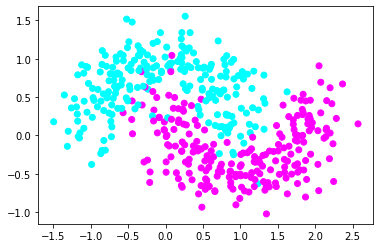

In [10]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
 
X, y = make_moons(n_samples=450, noise=.25, random_state=0)

## Splitting the data into training and testing
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.33)

plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')

### Decision Tree Classfier

In [11]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(max_depth=7) ## decision is taken at 7th depth itself
estimator.fit(Xtrn, ytrn)

ypred = estimator.predict(Xtst)

## Reporting Accuracy of Decision Tree Classifier

print("Accuracy: " + str(accuracy_score(ytst, ypred)))

Accuracy: 0.87248322147651


### Bagging Classfier on base classifier as Decision Tree

In [12]:
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier(max_depth=6) ## decision is taken at 6th depth
bag_ens = BaggingClassifier(base_estimator=base_estimator, n_estimators=500, 
                            max_samples=100, oob_score=True)
bag_ens.fit(Xtrn, ytrn)
ypred = bag_ens.predict(Xtst)

### Accuracy of Bagging Classifier on a base of Decision Tree Classifier

print("Out of Bag Score: " + str(bag_ens.oob_score_))
print("Accuracy: " + str(accuracy_score(ytst, ypred)))

Out of Bag Score: 0.9401993355481728
Accuracy: 0.8859060402684564


### Confusion Matrix for f1-score and recall for Decision Tree classifier

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cf_matrix = confusion_matrix(ytst, ypred)
print(cf_matrix)
print(classification_report(ytst, ypred))

[[68 10]
 [ 7 64]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        78
           1       0.86      0.90      0.88        71

    accuracy                           0.89       149
   macro avg       0.89      0.89      0.89       149
weighted avg       0.89      0.89      0.89       149



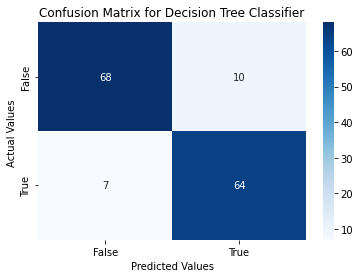

In [14]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Decision Tree Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

### Bagging Classifier on a different base classifier such as KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

base_estimator = KNeighborsClassifier(n_neighbors=8) ### Decision is taken at 8th neighbour
bag_ens = BaggingClassifier(base_estimator=base_estimator, n_estimators=500, 
                            max_samples=100, oob_score=True)
bag_ens.fit(Xtrn, ytrn)
ypred = bag_ens.predict(Xtst)

### Calculating Accuracy using a different base classifier such as KNN

print("Out of Bag Score: " + str(bag_ens.oob_score_))
print("Accuracy: " + str(accuracy_score(ytst, ypred)))

Out of Bag Score: 0.9568106312292359
Accuracy: 0.912751677852349


### Confusion Matrix for f1-score and recall for KNN classifier

In [16]:
cf_matrix = confusion_matrix(ytst, ypred)
print(cf_matrix)
print(classification_report(ytst, ypred))

[[71  7]
 [ 6 65]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        78
           1       0.90      0.92      0.91        71

    accuracy                           0.91       149
   macro avg       0.91      0.91      0.91       149
weighted avg       0.91      0.91      0.91       149



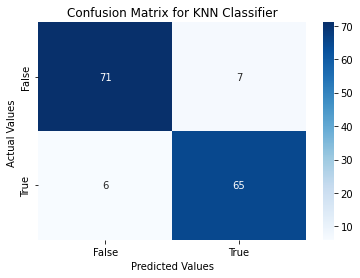

In [17]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for KNN Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()